# Income prediction
**Life cycle of Machine learning Project**

* Understanding the Problem Statement
* Data Collection
* Exploratory data analysis
* Data Cleaning
* Data Pre-Processing
* Feature Engineering

# 1) Problem statement.

1) Problem statement.
This dataset comprises the population data from various countries. It has several features such as age, type of employment, hours worked in a week, educational qualification, marital status etc. It also has the feature name income.  The purpose of this data analysis is to analyse the relationship between all the features with regard to income of a person. How these individual features or combination of the features affect the income of a person. The model built will predict the income of a person

2) Data Collection.
The Dataset is collected from https://archive.ics.uci.edu webiste
The data consists of 15 columns and 15000 rows.

2.1 Import Data and Required Packages

Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from six.moves import urllib
warnings.filterwarnings("ignore")
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

 Import the CSV Data as Pandas DataFrame

## 2) Data Collection.

In [140]:
import pandas as pd
data=pd.read_csv(r"Adult.csv")

In [141]:
# Take the sample of 10000 rows from the data

In [142]:
data = data.sample(10000)

In [143]:
# Show Top 5 Records

In [144]:
data.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
28844,20,Private,227626,HS-grad,9,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,60,United-States,<=50K
13269,35,Private,292185,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,<=50K
15754,47,Private,268022,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,55,United-States,>50K
30778,38,Private,167482,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,52,United-States,>50K
5009,76,Private,199949,9th,5,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,13,United-States,<=50K


In [145]:
# Shape of the dataset

In [146]:
data.shape

(10000, 15)

In [147]:
# Summary of the dataset

In [148]:
# Display summary statistics for a dataframe
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.00000
mean,38.540500,1.897363e+05,10.047300,1047.731400,87.584800,40.42880
std,13.621135,1.036759e+05,2.561663,7269.040588,405.534505,12.48377
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.00000
25%,28.000000,1.191470e+05,9.000000,0.000000,0.000000,40.00000
50%,37.000000,1.789830e+05,10.000000,0.000000,0.000000,40.00000
75%,47.250000,2.374435e+05,12.000000,0.000000,0.000000,45.00000
max,90.000000,1.455435e+06,16.000000,99999.000000,4356.000000,99.00000


In [149]:
# Check Datatypes in the dataset

In [150]:
# Check Null and Dtypes
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 28844 to 25539
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             10000 non-null  int64 
 1   workclass       10000 non-null  object
 2   fnlwgt          10000 non-null  int64 
 3   education       10000 non-null  object
 4   education-num   10000 non-null  int64 
 5   marital-status  10000 non-null  object
 6   occupation      10000 non-null  object
 7   relationship    10000 non-null  object
 8   race            10000 non-null  object
 9   sex             10000 non-null  object
 10  capital-gain    10000 non-null  int64 
 11  capital-loss    10000 non-null  int64 
 12  hours-per-week  10000 non-null  int64 
 13  native-country  10000 non-null  object
 14  income          10000 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.2+ MB


# 3. EXPLORING DATA

In [151]:
# define numerical & categorical columns
numeric_features = [feature for feature in data.columns if data[feature].dtype != 'O']
categorical_features = [feature for feature in data.columns if data[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 6 numerical features : ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

We have 9 categorical features : ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']


In [152]:
data.drop(data.loc[data['age']=='?'].index,inplace=True)

In [153]:
data.drop(data.loc[data['fnlwgt']=='?'].index,inplace=True)

In [154]:
data.drop(data.loc[data['education-num']=='?'].index,inplace=True)

In [155]:
data.drop(data.loc[data['capital-gain']=='?'].index,inplace=True)

In [156]:
data.drop(data.loc[data['capital-loss']=='?'].index,inplace=True)

In [157]:
data.drop(data.loc[data['hours-per-week']=='?'].index,inplace=True)

In [158]:
data.drop(data.loc[data['income']=='?'].index,inplace=True)

In [159]:
data.drop(data.loc[data['workclass']=='?'].index,inplace=True)

In [162]:
data.drop(data.loc[data['education']=='?'].index,inplace=True)

In [165]:
data.drop(data.loc[data['marital-status']=='?'].index,inplace=True)

In [166]:
data.drop(data.loc[data['occupation']=='?'].index,inplace=True)

In [167]:
data.drop(data.loc[data['occupation']=='?'].index,inplace=True)

In [168]:
data.drop(data.loc[data['race']=='?'].index,inplace=True)

In [169]:
data.drop(data.loc[data['sex']=='?'].index,inplace=True)

In [171]:
data.drop(data.loc[data['native-country']=='?'].index,inplace=True)

### Feature Information
* **age:** Age of the population
* **workclass:** working class of a person(whether private, govt etc)
* **fnlwgt:** 
* **education:** education qualification of the person
* **education-num:** education num of a person
* **marital-status:** marital status of the person
* **occupation:** The occupation of the person
* **race:** race of the person
* **sex:** sex of the person
* **capital-gain:** capital gain incurred by a person
* **capital-loss:** capital loss incurred by a person
* **hours-per-week:** hours worked by a person in a week
* **native-country:** The native country pf the person
* **income:** income of a person either less than or equal to 50k$  or more than 50k$

In [172]:
# proportion of count data on categorical columns
for col in categorical_features:
    print(data[col].value_counts(normalize=True) * 100)
    print('---------------------------')

Private             73.927571
Self-emp-not-inc     8.665661
Local-gov            6.585471
State-gov            4.300496
Self-emp-inc         3.492132
Federal-gov          2.920888
Without-pay          0.107782
Name: workclass, dtype: float64
---------------------------
HS-grad         33.207588
Some-college    22.246174
Bachelors       16.425954
Masters          5.313645
Assoc-voc        4.031041
11th             3.459797
Assoc-acdm       3.287346
10th             2.877775
7th-8th          1.886182
Prof-school      1.799957
9th              1.573615
12th             1.250269
Doctorate        1.153266
5th-6th          0.883811
1st-4th          0.495797
Preschool        0.107782
Name: education, dtype: float64
---------------------------
Married-civ-spouse       46.497090
Never-married            32.011209
Divorced                 14.162535
Widowed                   3.050226
Separated                 2.974779
Married-spouse-absent     1.239491
Married-AF-spouse         0.064669
Name: mar

## Univariate Analysis

* The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.

### Numerical Features

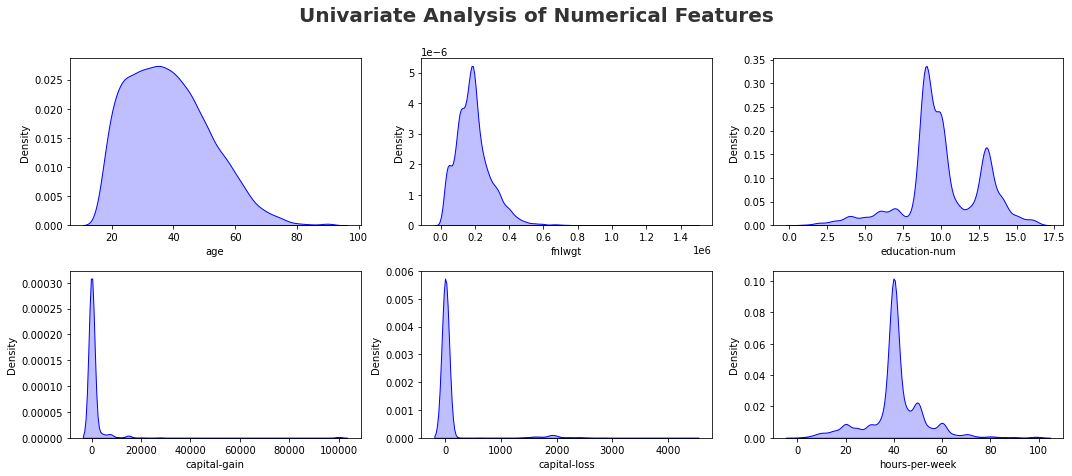

In [173]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=data[numeric_features[i]],shade=True, color='b')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

In [174]:
**Report**
* Density, fnlwgt, capital-gain, capital-loss are left skewed
* education-num is right skewed
* hours-per-week is center skewed

SyntaxError: invalid syntax (2137819156.py, line 1)

### Categorical Features

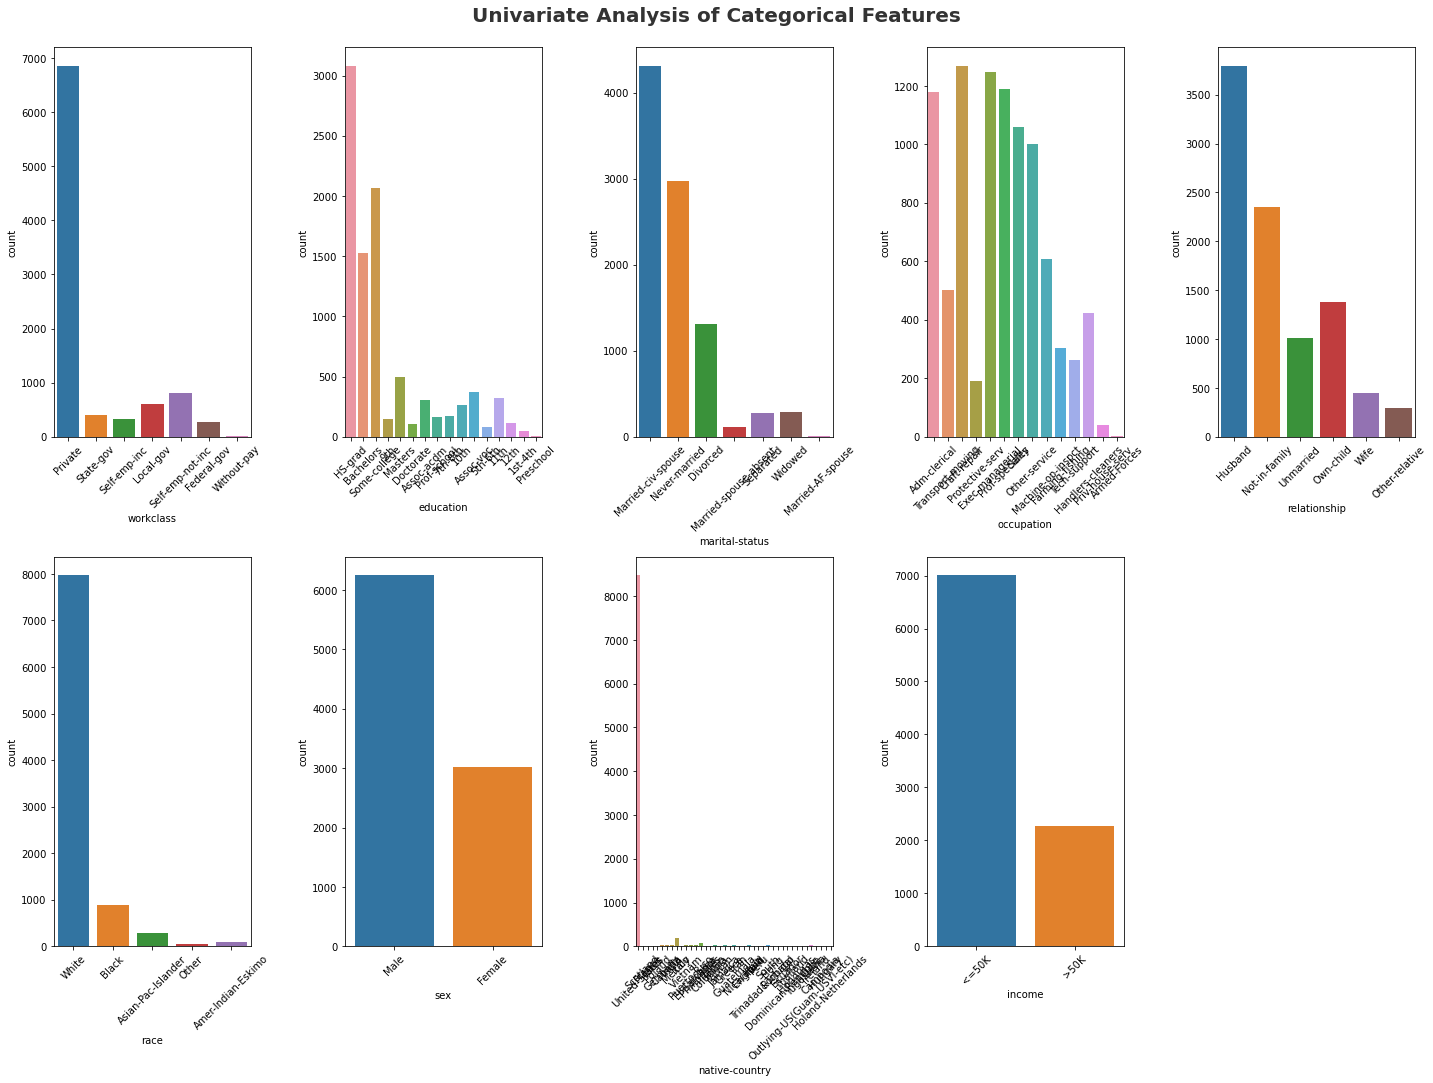

In [175]:
# categorical columns
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
cat1 = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']
for i in range(0, len(cat1)):
    plt.subplot(2, 5, i+1)
    sns.countplot(x=data[cat1[i]])
    plt.xlabel(cat1[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

## Multivariate Analysis

* Multivariate analysis is the analysis of more than one variable.

### Check Multicollinearity in Numerical features

In [176]:
data[(list(data.columns)[1:])].corr()

,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
fnlwgt,1.000000,-0.030721,0.009868,-0.002341,-0.028699
education-num,-0.030721,1.000000,0.119087,0.088033,0.152233
capital-gain,0.009868,0.119087,1.000000,-0.031893,0.090759
capital-loss,-0.002341,0.088033,-0.031893,1.000000,0.058087
hours-per-week,-0.028699,0.152233,0.090759,0.058087,1.000000


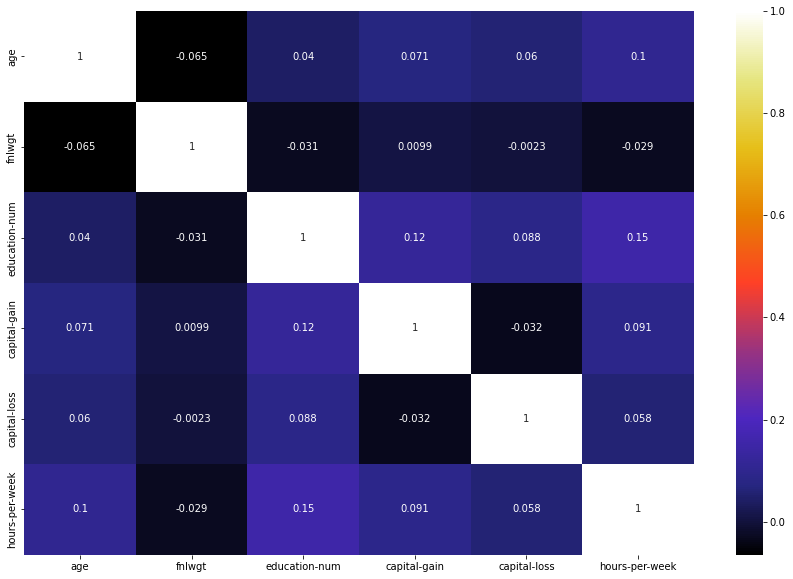

In [177]:
plt.figure(figsize = (15,10))
sns.heatmap(data.corr(), cmap="CMRmap", annot=True)
plt.show()

**Report** 
* Our target column income has a weak negative correlationwit hours-per-week
* age, eduacation-num has positive correlation with target column income

In [178]:
### Check Multicollinearity for Categorical features

* **A chi-squared test (also chi-square or χ2 test) is a statistical hypothesis test that is valid to perform when the test statistic is chi-squared distributed under the null hypothesis, specifically Pearson's chi-squared test**

* **A chi-square statistic is one way to show a relationship between two categorical variables.**

* **Here we test correlation of Categorical columns with Target column i.e income**

In [179]:
from scipy.stats import chi2_contingency
chi2_test = []
for feature in categorical_features:
    if chi2_contingency(pd.crosstab(data['income'], data[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[categorical_features, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,workclass,Reject Null Hypothesis
1,education,Reject Null Hypothesis
2,marital-status,Reject Null Hypothesis
3,occupation,Reject Null Hypothesis
4,relationship,Reject Null Hypothesis
5,race,Reject Null Hypothesis
6,sex,Reject Null Hypothesis
7,native-country,Reject Null Hypothesis
8,income,Reject Null Hypothesis


### Checking Null Values

In [180]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [181]:
continues_features=[feature for feature in numeric_features if len(data[feature].unique())>=10]
print('Num of continues features :',continues_features)

Num of continues features : ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']


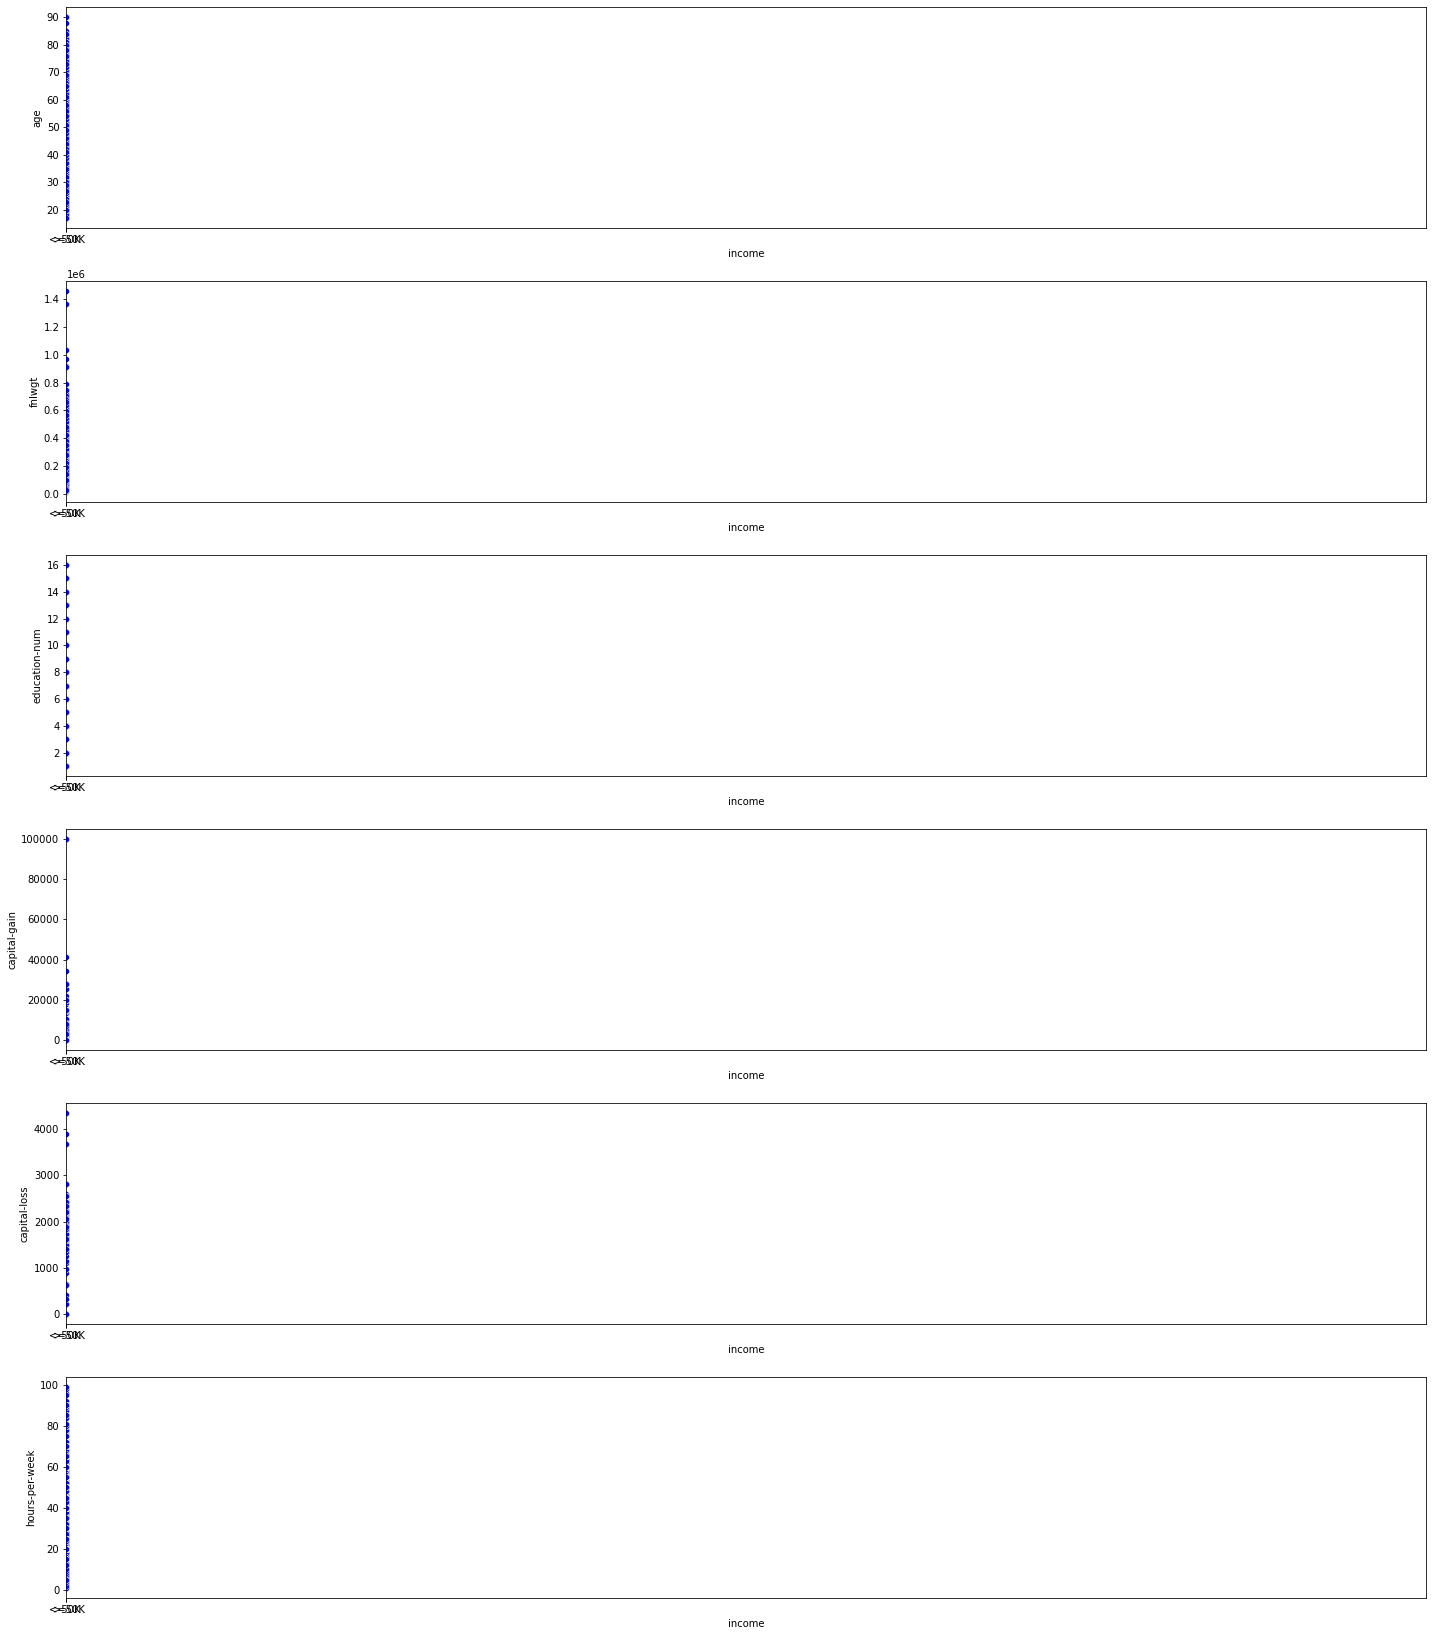

In [182]:
fig = plt.figure(figsize=(20, 30))

for i in range(0, len(continues_features)):
    ax = plt.subplot(8, 1, i+1)

    sns.scatterplot(data= data ,x='income', y=continues_features[i], color='b')
    plt.xlim(0,100000) # Limit to 100000
    plt.tight_layout()

## 4. Visualization

### 4.1 Visualize the Target Feature

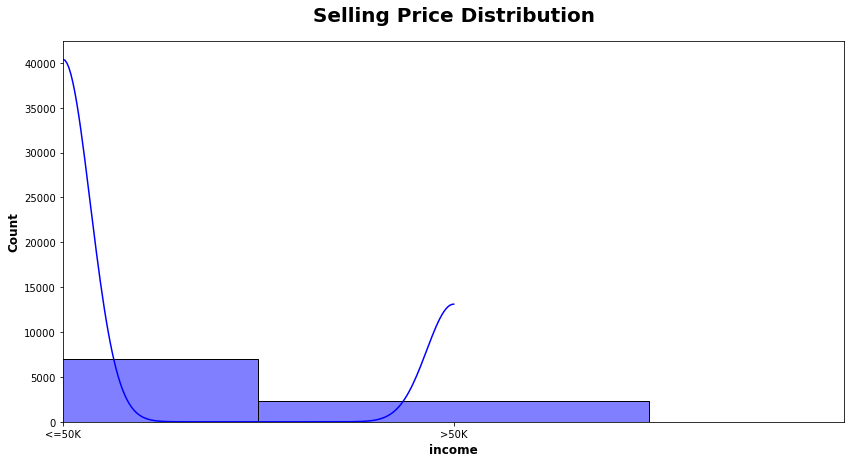

In [183]:
plt.subplots(figsize=(14,7))
sns.histplot(data.income, bins=200, kde=True, color = 'b')
plt.title("Selling Price Distribution", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("income", weight="bold", fontsize=12)
plt.xlim(0,2)
plt.show()

### 4.2 Most no working class in population?

In [184]:
data.workclass.value_counts()[0:10]

Private             6859
Self-emp-not-inc     804
Local-gov            611
State-gov            399
Self-emp-inc         324
Federal-gov          271
Without-pay           10
Name: workclass, dtype: int64

private sector accounts for more no of working class population followed by self employed

### 4.2 Most no education in population?

In [185]:
data.education.value_counts()[0:10]

HS-grad         3081
Some-college    2064
Bachelors       1524
Masters          493
Assoc-voc        374
11th             321
Assoc-acdm       305
10th             267
7th-8th          175
Prof-school      167
Name: education, dtype: int64

High school grads tops most in the list , followed by some college degree

### 4.2 Most no of race in population?

In [186]:
data.race.value_counts()[0:10]

White                 7970
Black                  882
Asian-Pac-Islander     281
Amer-Indian-Eskimo      86
Other                   59
Name: race, dtype: int64

White race tops the list , followed by black

In [187]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

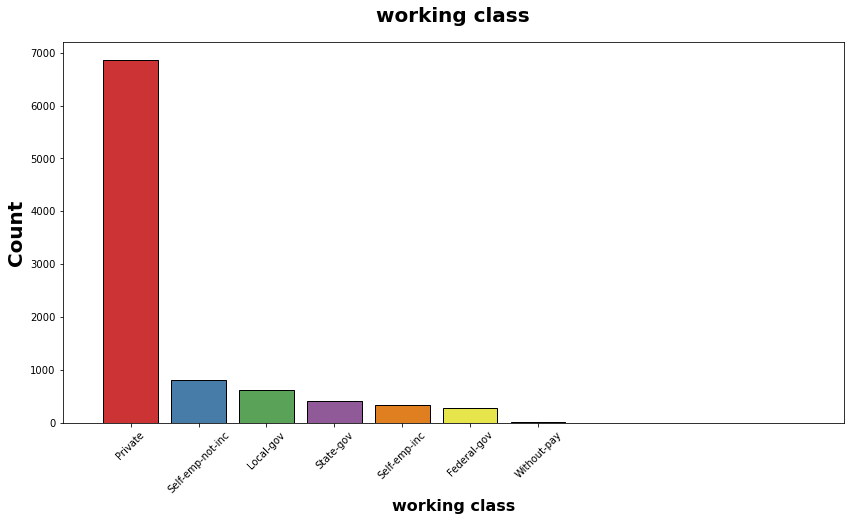

In [188]:
plt.subplots(figsize=(14,7))
sns.countplot(x="workclass", data=data,ec = "black",palette="Set1",order = data['workclass'].value_counts().index)
plt.title("working class", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=20)
plt.xlabel("working class", weight="bold", fontsize=16)
plt.xticks(rotation= 45)
plt.xlim(-1,10.5)
plt.show()

In [189]:
data.rename(columns = {'marital-status':'marital_status', 'native-country':'native_country'}, inplace = True)

In [190]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9278 entries, 28844 to 25539
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             9278 non-null   int64 
 1   workclass       9278 non-null   object
 2   fnlwgt          9278 non-null   int64 
 3   education       9278 non-null   object
 4   education-num   9278 non-null   int64 
 5   marital_status  9278 non-null   object
 6   occupation      9278 non-null   object
 7   relationship    9278 non-null   object
 8   race            9278 non-null   object
 9   sex             9278 non-null   object
 10  capital-gain    9278 non-null   int64 
 11  capital-loss    9278 non-null   int64 
 12  hours-per-week  9278 non-null   int64 
 13  native_country  9278 non-null   object
 14  income          9278 non-null   object
dtypes: int64(6), object(9)
memory usage: 1.4+ MB


In [191]:
data.shape

(9278, 15)

In [192]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,9278.0,38.416577,13.131366,17.0,28.00,37.0,47.0,90.0
fnlwgt,9278.0,189909.497090,104035.079673,13769.0,118948.75,179278.0,237797.0,1455435.0
education-num,9278.0,10.091507,2.534133,1.0,9.00,10.0,12.0,16.0
capital-gain,9278.0,1052.382733,7222.166277,0.0,0.00,0.0,0.0,99999.0
capital-loss,9278.0,89.688726,409.816277,0.0,0.00,0.0,0.0,4356.0
hours-per-week,9278.0,40.893727,12.112580,1.0,40.00,40.0,45.0,99.0


In [193]:
data['income'].replace(['<=50K', '>50K'],
                        [0, 1], inplace=True)

In [194]:
data["income"] = data["income"].astype("float")

In [195]:
list1 = data.columns.tolist()
for i in list1:
    print(data.groupby([i]).size().sort_values(ascending=False))
    print("**********************")

age
36    265
33    264
35    262
31    258
25    256
     ... 
82      2
84      2
85      2
83      1
88      1
Length: 71, dtype: int64
**********************
workclass
Private             6859
Self-emp-not-inc     804
Local-gov            611
State-gov            399
Self-emp-inc         324
Federal-gov          271
Without-pay           10
dtype: int64
**********************
fnlwgt
113364     7
221172     6
125461     6
125933     6
241998     6
          ..
148431     1
148409     1
148320     1
148316     1
1455435    1
Length: 7940, dtype: int64
**********************
education
HS-grad         3081
Some-college    2064
Bachelors       1524
Masters          493
Assoc-voc        374
11th             321
Assoc-acdm       305
10th             267
7th-8th          175
Prof-school      167
9th              146
12th             116
Doctorate        107
5th-6th           82
1st-4th           46
Preschool         10
dtype: int64
**********************
education-num
9     3081
10    2064

In [196]:
# Analysis

* Most of the population in the age group 30 to 40
* 2/3 of the population works in the private sector
* Most of the population is HS-grad, Some-college, Bachelors
* 80% of the population is white, 10% is black, rest are from other races
* Male population is twice the population of female
* Majority of the population data (90%) is from the US

# 5. Preprocessing

In [197]:
# Check for null values in the data

In [198]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native_country    0
income            0
dtype: int64

In [199]:
# Let us group by occupation

In [200]:
data.groupby('native_country').size().sort_values(ascending=False)

native_country
United-States                 8476
Mexico                         191
Philippines                     67
Canada                          35
Puerto-Rico                     35
El-Salvador                     34
Germany                         33
Jamaica                         28
India                           28
Vietnam                         23
England                         22
Japan                           21
Cuba                            20
South                           20
Guatemala                       20
Italy                           18
China                           18
Iran                            18
Poland                          15
Dominican-Republic              15
Columbia                        15
Portugal                        10
Peru                            10
Ecuador                         10
Nicaragua                       10
Thailand                         9
Taiwan                           9
Haiti                            9
Greec

* USA has the largest data, followed by mexico, ?, phillipplines
* Hungary has the least data in this dataset

In [201]:
# Now let us group by income 

In [202]:
data.groupby('income').size().sort_values(ascending=False)

income
0.0    7004
1.0    2274
dtype: int64

* Largest population earns less than or equal to 50k per annum
* close to quarter of the population earns more than 50k per annum

In [203]:
# Now let us group by sex

In [204]:
data.groupby('sex').size().sort_values(ascending=False)

sex
Male      6249
Female    3029
dtype: int64

Male population is twice the population of Female population in the dataset

# Splitting of the Data

In [205]:
y = data['income']
X = data.drop('income', axis = 1)

In [206]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, test_size = 0.2) 

In [207]:
category_var = [col for col in X.columns if X[col].dtypes == object]
category_var

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [208]:
numeric_var = [col for col in X.columns if X[col].dtypes != object]
numeric_var

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [209]:
# Feature Scaling

In [210]:
one_hot = ce.OneHotEncoder(cols = category_var, handle_unknown = 'ignore')

# Creating dataframe for categorical variables which converted to one hot encoded variables.
X_train_one_hot = pd.DataFrame(one_hot.fit_transform(X_train))
X_test_one_hot = pd.DataFrame(one_hot.transform(X_test))


X_train_one_hot.index = X_train.index
X_test_one_hot.index = X_test.index

num_X_train = X_train[numeric_var]
num_X_test = X_test[numeric_var]

# Joining numerical and one hot encoded variables to create our final X_train and X_test.
X_train_new = pd.concat([num_X_train, X_train_one_hot], axis = 1)
X_test_new = pd.concat([num_X_test, X_test_one_hot], axis = 1)

In [211]:
# Scaling our records into standard range of 0 and 1.
scaler = StandardScaler()

X_train_new = scaler.fit_transform(X_train_new)
X_test_new = scaler.transform(X_test_new)

# 6. Model building

In [212]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [213]:
model.fit(X_train_new,y_train)

DecisionTreeClassifier()

In [214]:
model.score(X_train_new,y_train)

1.0

[Text(0.5416666666666666, 0.9166666666666666, 'X[32] <= 0.077\ngini = 0.365\nsamples = 7422\nvalue = [5638, 1784]'),
 Text(0.28125, 0.75, 'X[3] <= 0.825\ngini = 0.124\nsamples = 3996\nvalue = [3730, 266]'),
 Text(0.16666666666666666, 0.5833333333333334, 'X[31] <= 1.36\ngini = 0.103\nsamples = 3942\nvalue = [3728, 214]'),
 Text(0.08333333333333333, 0.4166666666666667, 'X[67] <= 5.128\ngini = 0.076\nsamples = 3724\nvalue = [3577, 147]'),
 Text(0.041666666666666664, 0.25, 'X[68] <= 0.304\ngini = 0.07\nsamples = 3701\nvalue = [3567, 134]'),
 Text(0.020833333333333332, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.0625, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.125, 0.25, 'X[5] <= 0.097\ngini = 0.491\nsamples = 23\nvalue = [10, 13]'),
 Text(0.10416666666666667, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.14583333333333334, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.25, 0.4166666666666667, 'X[68] <= 0.263\ngini = 0.426\nsamples = 218\nvalue = [151, 67]'),
 Text(0.208333333333333

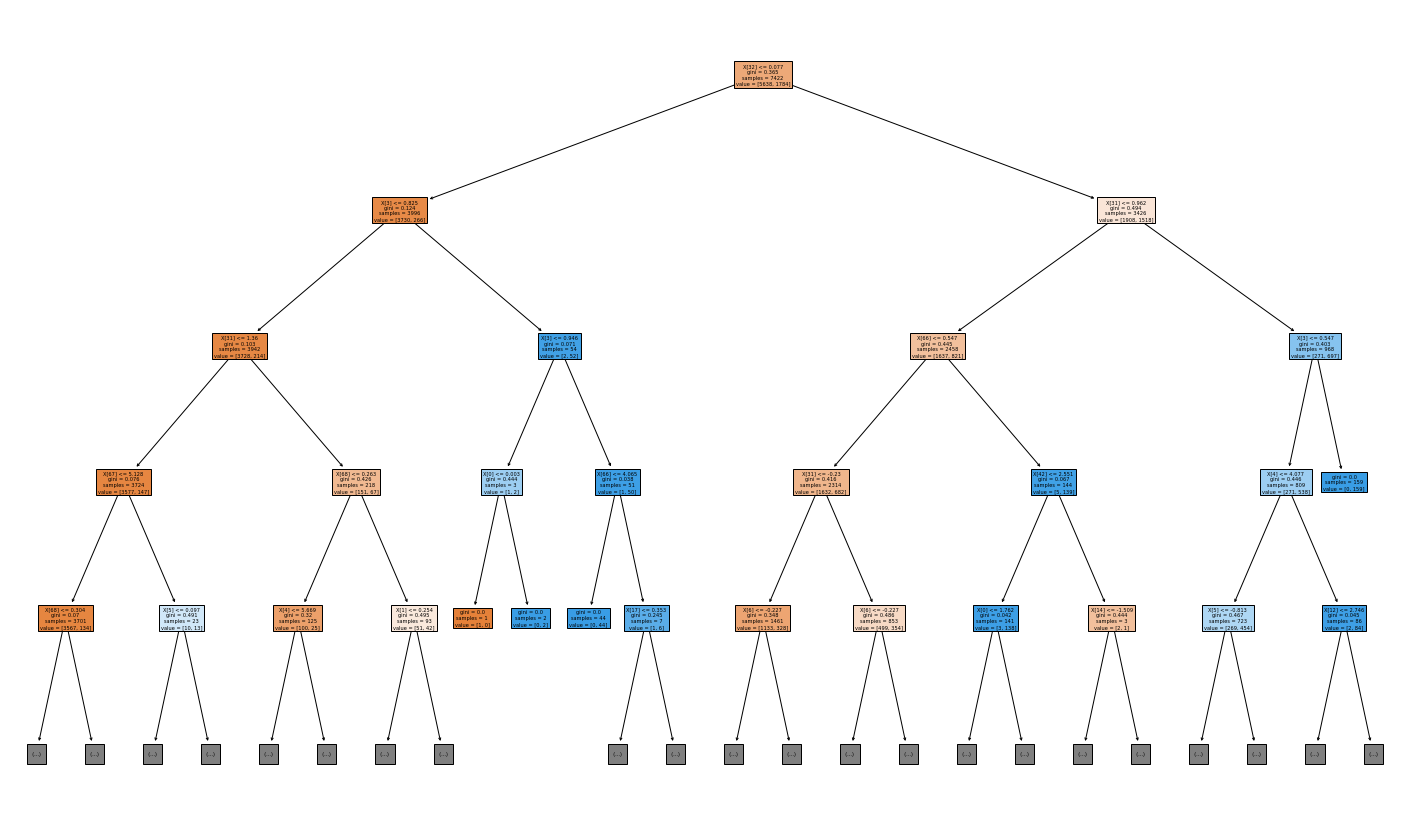

In [215]:
from sklearn import tree
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(25,15))
tree.plot_tree(model, max_depth=4,filled=True)

In [216]:
fig.savefig("decistion_tree_classifier_census_income.png")

In [217]:
y_predict=model.predict(X_test_new)

In [218]:
from sklearn.metrics import accuracy_score

In [219]:
accuracy_score(y_test,y_predict)

0.7850215517241379

In [220]:
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,10,1),
    'min_samples_leaf' : range(1,8,1),
    'min_samples_split': range(2,8,1),
    'splitter' : ['best', 'random']
    
}

In [221]:
from sklearn.model_selection import GridSearchCV
grid_searh=GridSearchCV(estimator=model,param_grid=grid_param,cv=2,verbose=1)

In [223]:
grid_searh.fit(X_train_new,y_train)

Fitting 2 folds for each of 1344 candidates, totalling 2688 fits


GridSearchCV(cv=2, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10),
                         'min_samples_leaf': range(1, 8),
                         'min_samples_split': range(2, 8),
                         'splitter': ['best', 'random']},
             verbose=1)

In [225]:
grid_searh.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'min_samples_leaf': 7,
 'min_samples_split': 3,
 'splitter': 'best'}

In [226]:
model_with_best_params=DecisionTreeClassifier(criterion= 'entropy',max_depth= 5,min_samples_leaf= 3,min_samples_split= 5,splitter='random')

In [228]:
model_with_best_params.fit(X_train_new,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=3,
                       min_samples_split=5, splitter='random')

In [229]:
DecisionTreeClassifier(criterion='gini', max_depth=8, min_samples_leaf=7,
                       min_samples_split=3, splitter='best')

DecisionTreeClassifier(max_depth=8, min_samples_leaf=7, min_samples_split=3)

[Text(0.5520833333333334, 0.9166666666666666, 'X[32] <= 0.966\nentropy = 0.796\nsamples = 7422\nvalue = [5638, 1784]'),
 Text(0.3020833333333333, 0.75, 'X[2] <= 0.993\nentropy = 0.353\nsamples = 3996\nvalue = [3730, 266]'),
 Text(0.16666666666666666, 0.5833333333333334, 'X[35] <= 0.027\nentropy = 0.203\nsamples = 3160\nvalue = [3060, 100]'),
 Text(0.08333333333333333, 0.4166666666666667, 'X[3] <= 0.689\nentropy = 0.327\nsamples = 1302\nvalue = [1224, 78]'),
 Text(0.041666666666666664, 0.25, 'X[64] <= 0.253\nentropy = 0.289\nsamples = 1285\nvalue = [1220, 65]'),
 Text(0.020833333333333332, 0.08333333333333333, 'entropy = 0.169\nsamples = 837\nvalue = [816, 21]'),
 Text(0.0625, 0.08333333333333333, 'entropy = 0.463\nsamples = 448\nvalue = [404, 44]'),
 Text(0.125, 0.25, 'X[3] <= 1.004\nentropy = 0.787\nsamples = 17\nvalue = [4, 13]'),
 Text(0.10416666666666667, 0.08333333333333333, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.14583333333333334, 0.08333333333333333, 'entropy = 0

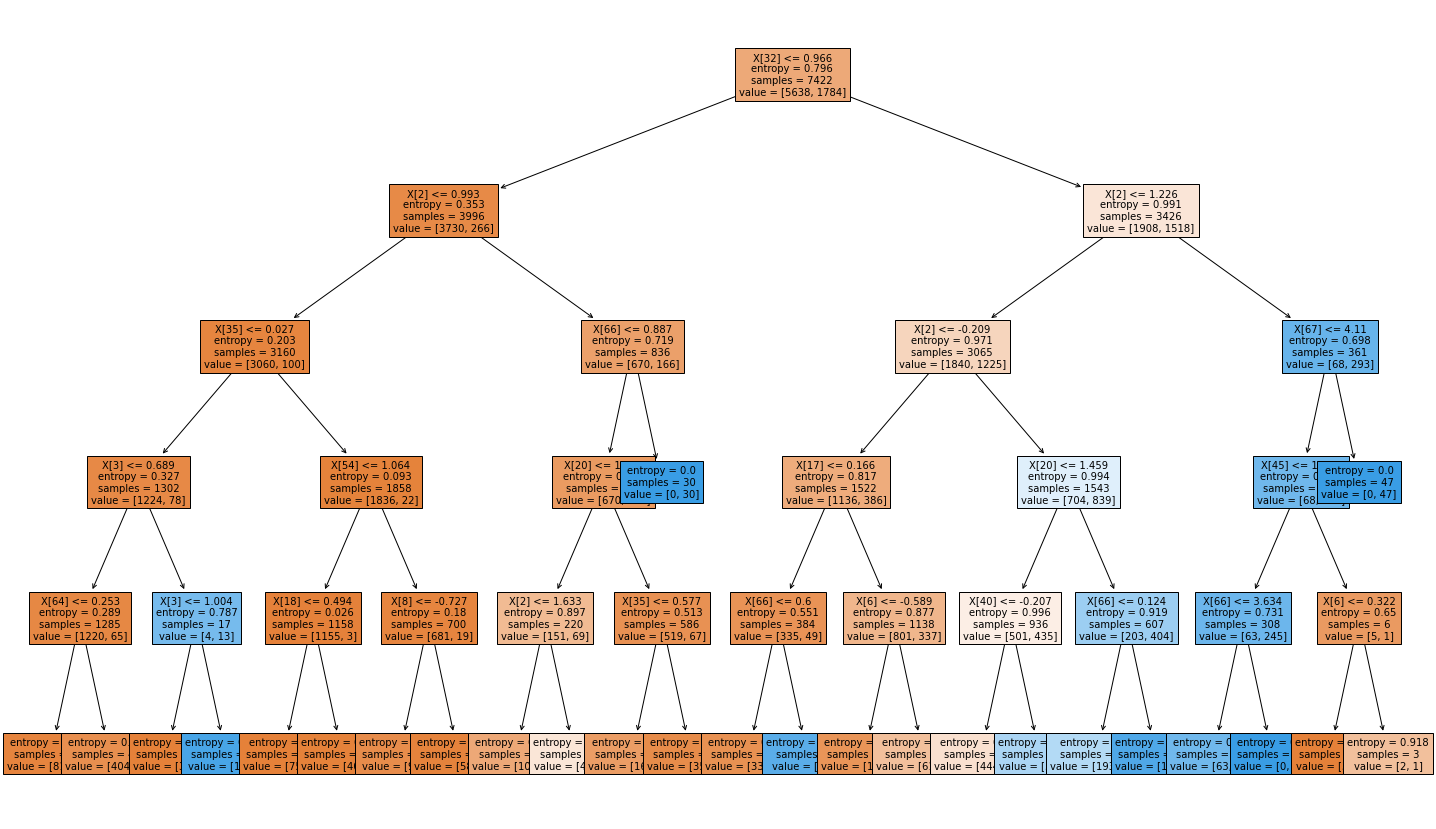

In [230]:
from sklearn import tree
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(25,15))
tree.plot_tree(model_with_best_params,filled=True,fontsize=10)

In [231]:
y_prediction2=model_with_best_params.predict(X_test_new)

In [232]:
accuracy_score(y_test,y_prediction2)

0.8275862068965517

With Hyper parameter tuning accuracy increased from 0.7850215517241379 to 0.8275862068965517